In [2]:
from ClasificadorVecinosProximos import ClasificadorVecinosProximos
from Datos import Datos
from ValidacionSimple import ValidacionSimple

conjuntos_de_datos = ['example1', 'example2', 'example3', 'example4', 'wdbc']

val = ValidacionSimple(70)

valores_de_k = [1, 3, 5, 11, 21, 51]
for nombre_fichero in conjuntos_de_datos:
    datos = Datos('ConjuntosDatos/' + nombre_fichero + '.data')
    
    print(nombre_fichero, ":", sep='')
    for k in valores_de_k:
        val.creaParticiones(datos.datos)
        
        knn = ClasificadorVecinosProximos(k)
        
        errores, tasa_de_error = knn.validacion(val, datos, knn, normalizar_datos=True)
        
        print("\tTasa de error: k=", k, ":\t\t", tasa_de_error, sep='')


example1:
	Tasa de error: k=1:		0.15833333333333333


	Tasa de error: k=3:		0.20833333333333334
	Tasa de error: k=5:		0.14166666666666666


	Tasa de error: k=11:		0.13333333333333333
	Tasa de error: k=21:		0.15833333333333333
	Tasa de error: k=51:		0.125
example2:
	Tasa de error: k=

1:		0.0
	Tasa de error: k=3:		0.0
	Tasa de error: k=5:		0.0
	Tasa de error: k=11:		0.0


	Tasa de error: k=21:		0.0
	Tasa de error: k=51:		0.0
example3:
	Tasa de error: k=1:		0.025


	Tasa de error: k=3:		0.05
	Tasa de error: k=5:		0.03333333333333333
	Tasa de error: k=11:		0.03333333333333333


	Tasa de error: k=21:		0.05
	Tasa de error: k=51:		0.025
example4:
	Tasa de error: k=1:		0.0
	Tasa de error: k=3:		0.0
	Tasa de error: k=5:		0.0
	Tasa de error: k=11:		0.0
	Tasa de error: k=21:		0.0
	Tasa de error: k=51:		0.0
wdbc:


	Tasa de error: k=1:		0.06432748538011696


	Tasa de error: k=3:		0.017543859649122806


	Tasa de error: k=5:		0.017543859649122806


	Tasa de error: k=11:		0.029239766081871343


	Tasa de error: k=21:		0.07602339181286549


	Tasa de error: k=51:		0.029239766081871343


# Comentar resultados y por qué hemos puesto los métodos en cada sitio

In [3]:
from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
from Datos import Datos
from ValidacionSimple import ValidacionSimple

conjuntos_de_datos = ['example1', 'example2', 'example3', 'example4', 'wdbc']

val = ValidacionSimple(70)
reg = ClasificadorRegresionLogistica()

for nombre_fichero in conjuntos_de_datos:
    datos = Datos('ConjuntosDatos/' + nombre_fichero + '.data')
    
    print(nombre_fichero, ":", sep='')
    
    val.creaParticiones(datos.datos)
    errores, tasa_de_error = reg.validacion(val, datos, reg)
    
    print("\tTasa de error: ", ":\t", tasa_de_error, sep='')


example1:
	Tasa de error: :	0.43333333333333335
example2:
	Tasa de error: :	0.275
example3:


	Tasa de error: :	0.6583333333333333
example4:
	Tasa de error: :	0.0
wdbc:
	Tasa de error: :	0.0935672514619883


example1:


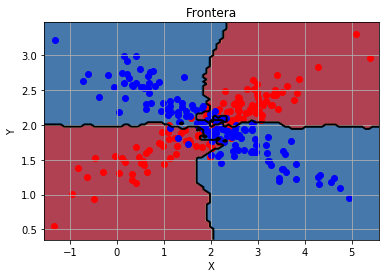

<Figure size 432x288 with 0 Axes>

example2:


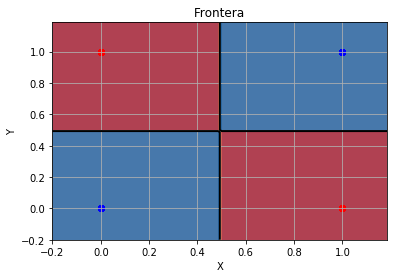

<Figure size 432x288 with 0 Axes>

example3:


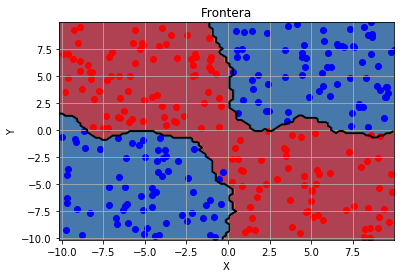

<Figure size 432x288 with 0 Axes>

example4:


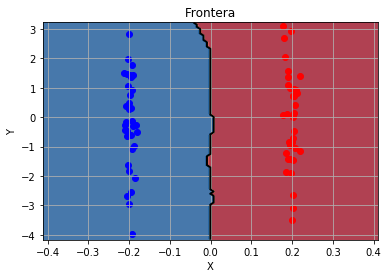

<Figure size 432x288 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt

% matplotlib inline

from ClasificadorVecinosProximos import ClasificadorVecinosProximos
from Datos import Datos
from ValidacionSimple import ValidacionSimple
from plotModel import plotModel

conjuntos_de_datos = ['example1', 'example2', 'example3', 'example4']

val = ValidacionSimple(70)
knn = ClasificadorVecinosProximos(5)

for nombre_fichero in conjuntos_de_datos:
    datos = Datos('ConjuntosDatos/' + nombre_fichero + '.data')
    
    print(nombre_fichero, ":", sep='')
    
    val.creaParticiones(datos.datos)
    datosTrain = datos.extraeDatos(val.particiones[-1].indicesTrain)
    datosTest = datos.extraeDatos(val.particiones[-1].indicesTest)
    knn.entrenamiento(datosTrain, datos.nominalAtributos, datos.diccionarios)
    
    ii = val.particiones[-1].indicesTrain
    x = datos.datos[ii, 0]
    y = datos.datos[ii, 1]
    clase = datos.datos[ii, -1]
    plotModel(x, y, clase != 0, knn, "Frontera", datos.diccionarios)
    
    plt.figure()
    plt.show()

example1:


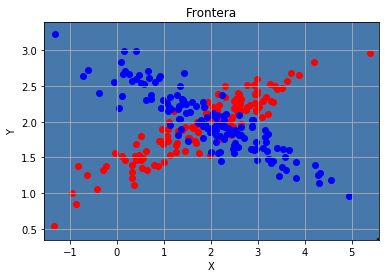

<Figure size 432x288 with 0 Axes>

example2:


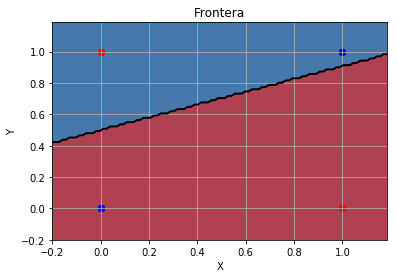

<Figure size 432x288 with 0 Axes>

example3:


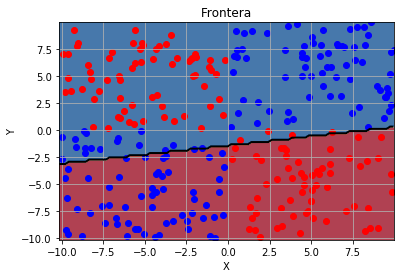

<Figure size 432x288 with 0 Axes>

example4:


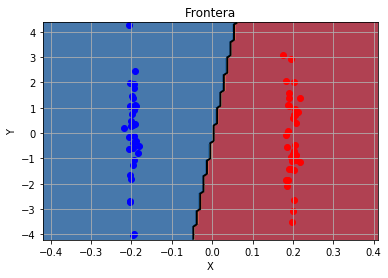

<Figure size 432x288 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt

% matplotlib inline

from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
from Datos import Datos
from ValidacionSimple import ValidacionSimple
from plotModel import plotModel

conjuntos_de_datos = ['example1', 'example2', 'example3', 'example4']

val = ValidacionSimple(70)
reg = ClasificadorRegresionLogistica()

for nombre_fichero in conjuntos_de_datos:
    datos = Datos('ConjuntosDatos/' + nombre_fichero + '.data')
    
    print(nombre_fichero, ":", sep='')
    
    val.creaParticiones(datos.datos)
    datosTrain = datos.extraeDatos(val.particiones[-1].indicesTrain)
    datosTest = datos.extraeDatos(val.particiones[-1].indicesTest)
    reg.entrenamiento(datosTrain, datos.nominalAtributos, datos.diccionarios)
    
    ii = val.particiones[-1].indicesTrain
    x = datos.datos[ii, 0]
    y = datos.datos[ii, 1]
    clase = datos.datos[ii, -1]
    plotModel(x, y, clase != 0, reg, "Frontera", datos.diccionarios)
    
    plt.figure()
    plt.show()